In [8]:
import pandas as pd

# Đọc trade data
trade = pd.read_csv("trade_vn1.csv")

# Đổi tên cho dễ
trade = trade.rename(columns={
    "Export in 1000 USD ": "Export",
    "Import in 1000 USD ": "Import"
})

# Xử lý missing
trade["Export"] = trade["Export"].fillna(0)
trade["Import"] = trade["Import"].fillna(0)

# Gộp theo năm
trade_year = trade.groupby("Year").agg({
    "Export": "sum",
    "Import": "sum"
}).reset_index()

# Tạo biến cán cân thương mại
trade_year["TradeBalance"] = trade_year["Export"] - trade_year["Import"]

print(trade_year.head())

trade_year["Export"] *= 1000
trade_year["Import"] *= 1000
trade_year["TradeBalance"] *= 1000

macro = pd.read_csv("macro_vn1.csv")

# Đổi tên cột năm cho đồng nhất
macro = macro.rename(columns={"Time": "Year"})

# Merge
df = pd.merge(
    macro,
    trade_year,
    on="Year",
    how="left"
)

print(df.head())

print(df.isna().sum())

   Year        Export        Import  TradeBalance
0  1997  1.836997e+07  2.318466e+07  -4814688.320
1  1998  1.872052e+07  2.325930e+07  -4538773.904
2  1999  2.308272e+07  2.348411e+07   -401394.048
3  2000  2.896549e+07  3.127306e+07  -2307570.000
4  2001  3.005838e+07  3.243586e+07  -2377476.310
   Year Time Code Country Name Country Code  \
0  1960    YR1960     Viet Nam          VNM   
1  1961    YR1961     Viet Nam          VNM   
2  1962    YR1962     Viet Nam          VNM   
3  1963    YR1963     Viet Nam          VNM   
4  1964    YR1964     Viet Nam          VNM   

  GDP (current US$) [NY.GDP.MKTP.CD]  \
0                                 ..   
1                                 ..   
2                                 ..   
3                                 ..   
4                                 ..   

  Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]  \
0                                                 ..       
1                                                 ..    

===== DỮ LIỆU TRƯỚC TIỀN XỬ LÝ =====


,Year,Time Code,Country Name,Country Code,GDP,Inflation,GDP_growth,GDP_per_capita,Population,FDI,FDI_BOP,Export,Import,TradeBalance
0,1960,YR1960,Viet Nam,VNM,NaN,NaN,NaN,NaN,32531933.0,NaN,NaN,NaN,NaN,NaN
1,1961,YR1961,Viet Nam,VNM,NaN,NaN,NaN,NaN,33409059.0,NaN,NaN,NaN,NaN,NaN
2,1962,YR1962,Viet Nam,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,YR1963,Viet Nam,VNM,NaN,NaN,NaN,NaN,35249101.0,NaN,NaN,NaN,NaN,NaN
4,1964,YR1964,Viet Nam,VNM,NaN,NaN,NaN,NaN,36201563.0,NaN,NaN,NaN,NaN,NaN



GIÁ TRỊ THIẾU:


Year               0
Time Code          0
Country Name       0
Country Code       0
GDP               25
Inflation         36
GDP_growth        25
GDP_per_capita    25
Population         1
FDI               25
FDI_BOP           10
Export            38
Import            38
TradeBalance      38
dtype: int64


===== DỮ LIỆU SAU TIỀN XỬ LÝ (BACKFILL) =====


,Year,Time Code,Country Name,Country Code,GDP,Inflation,GDP_growth,GDP_per_capita,Population,FDI,FDI_BOP,Export,Import,TradeBalance
0,1985,YR1985,Viet Nam,VNM,1.409469e+10,5.675,3.805856,238.647805,59060622.0,-0.000568,-80000.0,1.836997e+10,2.318466e+10,-4.814688e+09
1,1986,YR1986,Viet Nam,VNM,2.633662e+10,5.675,2.789292,436.419297,60347048.0,0.000152,40000.0,1.836997e+10,2.318466e+10,-4.814688e+09
2,1987,YR1987,Viet Nam,VNM,3.665811e+10,5.675,3.583470,595.247489,61584651.0,0.028271,10363703.7,1.836997e+10,2.318466e+10,-4.814688e+09
3,1988,YR1988,Viet Nam,VNM,2.542381e+10,5.675,5.135012,404.559305,62843228.0,0.030208,7679999.9,1.836997e+10,2.318466e+10,-4.814688e+09
4,1989,YR1989,Viet Nam,VNM,6.293305e+09,5.675,7.364513,98.107017,64147348.0,0.064672,4070000.0,1.836997e+10,2.318466e+10,-4.814688e+09



GIÁ TRỊ THIẾU:


Year              0
Time Code         0
Country Name      0
Country Code      0
GDP               0
Inflation         0
GDP_growth        0
GDP_per_capita    0
Population        0
FDI               0
FDI_BOP           0
Export            0
Import            0
TradeBalance      0
dtype: int64


===== THỐNG KÊ MÔ TẢ =====


,Year,GDP,Inflation,GDP_growth,GDP_per_capita,Population,FDI,FDI_BOP,Export,Import,TradeBalance
count,40.000000,4.000000e+01,40.000000,40.000000,40.000000,4.000000e+01,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,2004.500000,1.326083e+11,5.628732,6.379759,1438.796853,8.133893e+07,4.712333,6.218486e+09,1.898010e+11,1.904617e+11,-6.607274e+08
std,11.690452,1.419745e+11,4.310044,1.712643,1410.533678,1.258126e+07,2.690466,6.415620e+09,2.342006e+11,2.203721e+11,1.878084e+10
min,1985.000000,6.293305e+09,-1.710337,2.553729,98.107017,5.906062e+07,-0.000568,-8.000000e+04,1.836997e+10,2.318466e+10,-3.605740e+10
25%,1994.750000,2.610842e+10,3.248332,5.477883,361.570645,7.175105e+07,3.843601,1.299500e+09,1.836997e+10,2.318466e+10,-6.438809e+09
50%,2004.500000,5.153056e+10,5.675000,6.556627,652.997124,8.071364e+07,4.291599,2.307500e+09,5.893216e+10,6.872994e+10,-4.814688e+09
75%,2014.250000,2.349032e+11,6.623752,7.389636,2554.180697,9.196550e+07,5.117300,1.013425e+10,3.063341e+11,3.046465e+11,1.924328e+09
max,2024.000000,4.763882e+11,23.115448,9.540480,4717.290287,1.009877e+08,11.939483,2.017000e+10,7.418183e+11,7.175766e+11,5.526765e+10



CÁC BIẾN DÙNG TRONG MA TRẬN TƯƠNG QUAN:
['GDP', 'GDP_per_capita', 'GDP_growth', 'Population', 'Export', 'Import', 'TradeBalance', 'FDI', 'FDI_BOP', 'Inflation']


,GDP,GDP_per_capita,GDP_growth,Population,Export,Import,TradeBalance,FDI,FDI_BOP,Inflation
GDP,1.000000,0.998842,-0.130150,0.894405,0.987950,0.988172,0.724825,-0.008178,0.978036,-0.179687
GDP_per_capita,0.998842,1.000000,-0.140230,0.900331,0.981503,0.983292,0.701703,-0.011760,0.978461,-0.161610
GDP_growth,-0.130150,-0.140230,1.000000,0.024644,-0.132782,-0.131193,-0.116416,0.536057,-0.073078,-0.016981
Population,0.894405,0.900331,0.024644,1.000000,0.859975,0.873027,0.480044,0.229936,0.921242,-0.074127
Export,0.987950,0.981503,-0.132782,0.859975,1.000000,0.998435,0.754665,-0.016527,0.962393,-0.225403
Import,0.988172,0.983292,-0.131193,0.873027,0.998435,1.000000,0.716797,-0.001727,0.969503,-0.196637
TradeBalance,0.724825,0.701703,-0.116416,0.480044,0.754665,0.716797,1.000000,-0.185832,0.625196,-0.503512
FDI,-0.008178,-0.011760,0.536057,0.229936,-0.016527,-0.001727,-0.185832,1.000000,0.140488,0.211339
FDI_BOP,0.978036,0.978461,-0.073078,0.921242,0.962393,0.969503,0.625196,0.140488,1.000000,-0.094729
Inflation,-0.179687,-0.161610,-0.016981,-0.074127,-0.225403,-0.196637,-0.503512,0.211339,-0.094729,1.000000


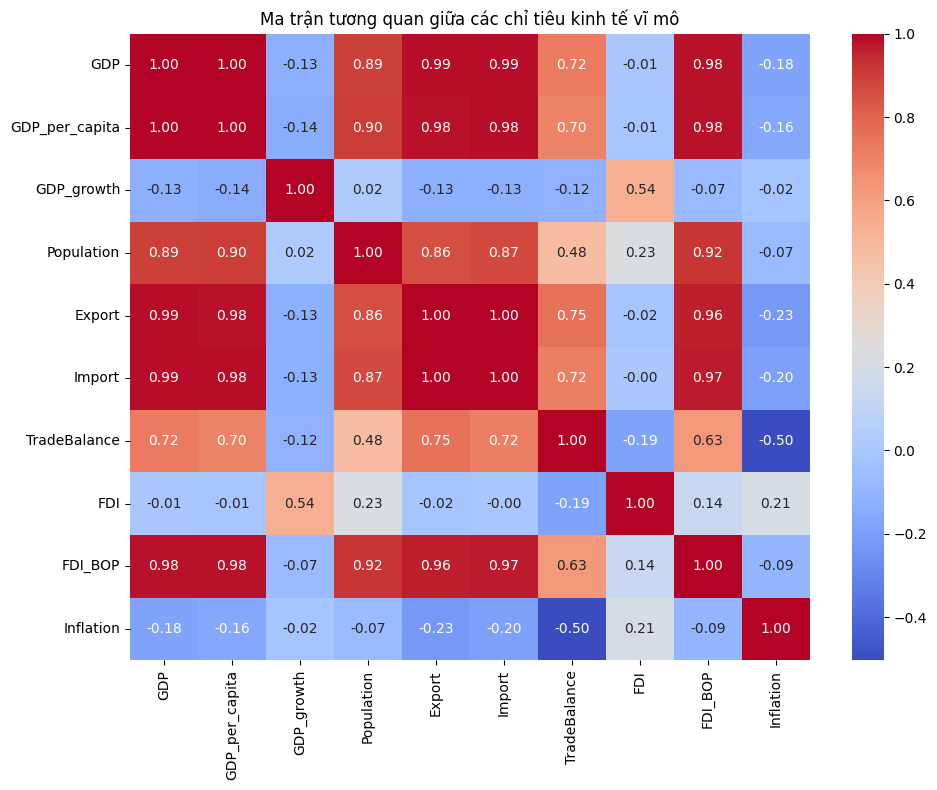

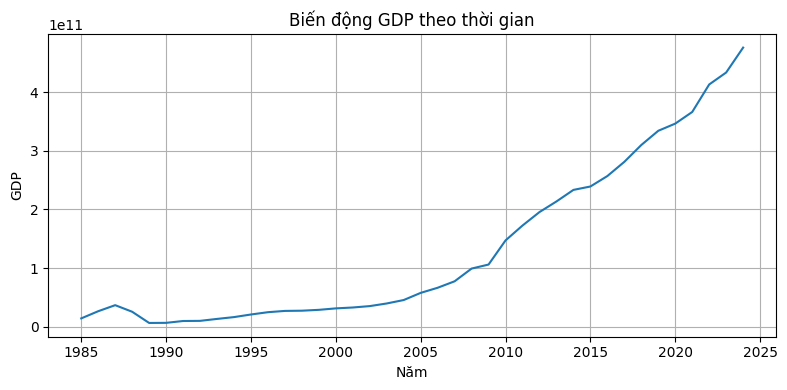

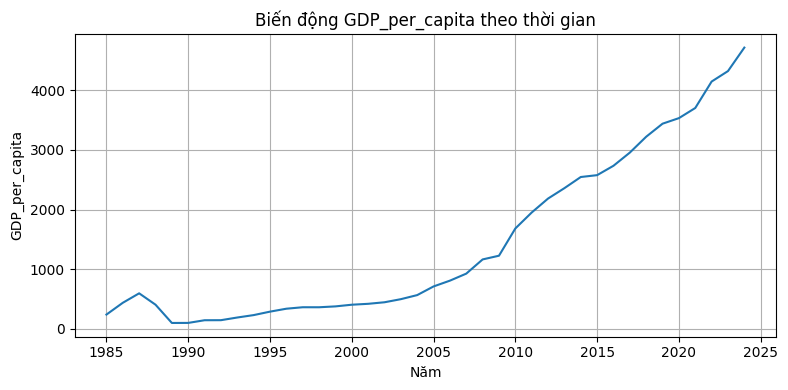

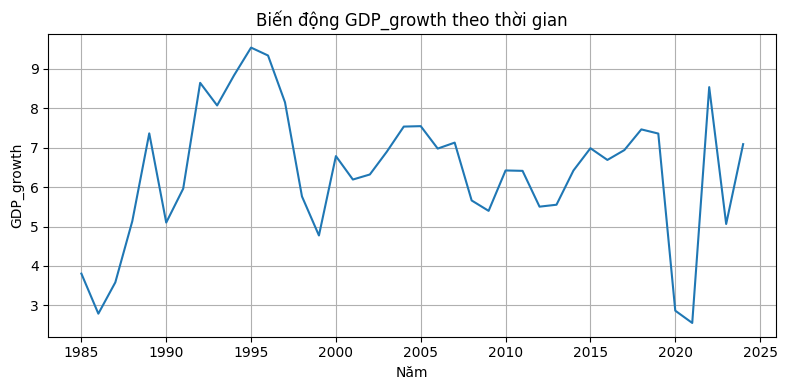

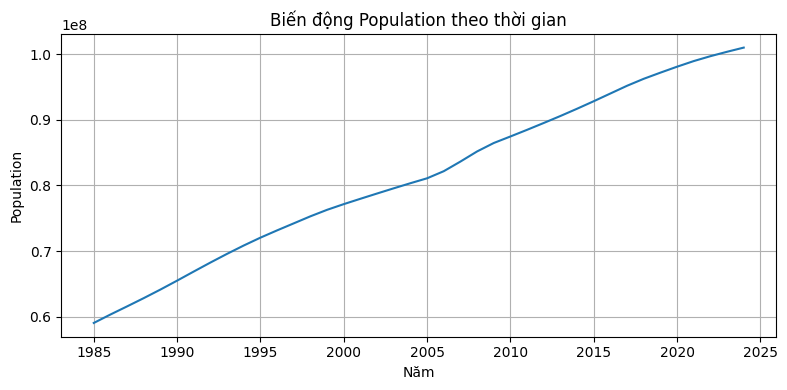

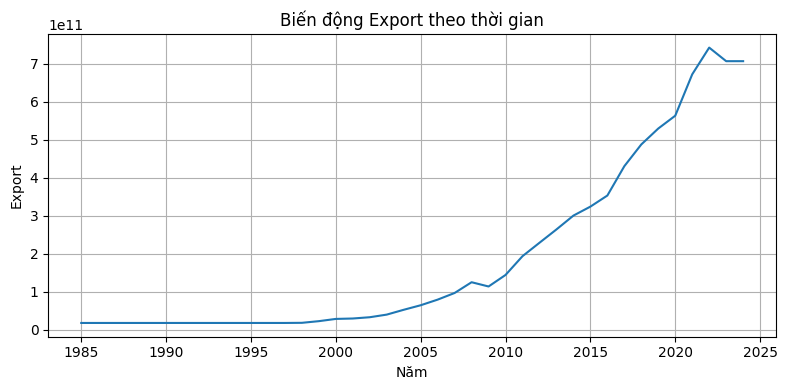

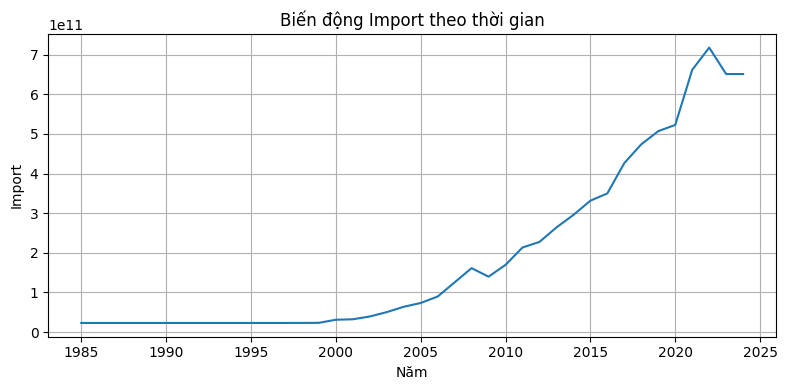

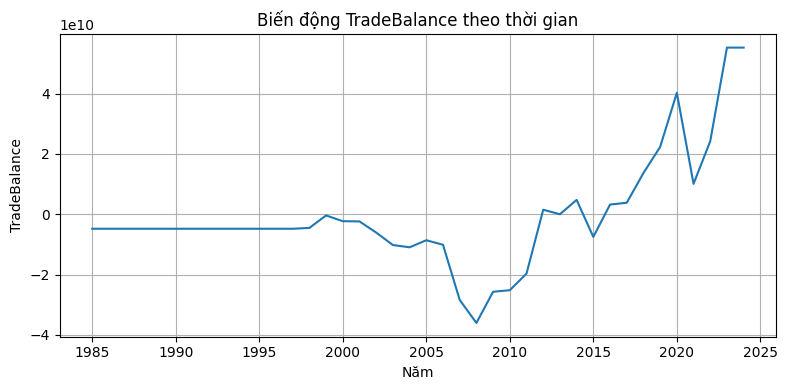

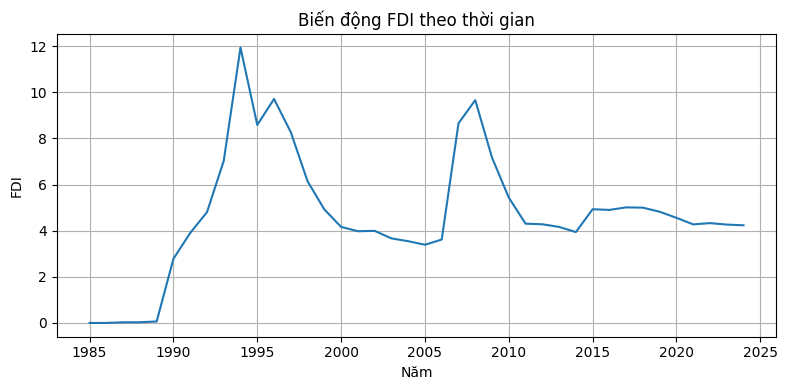

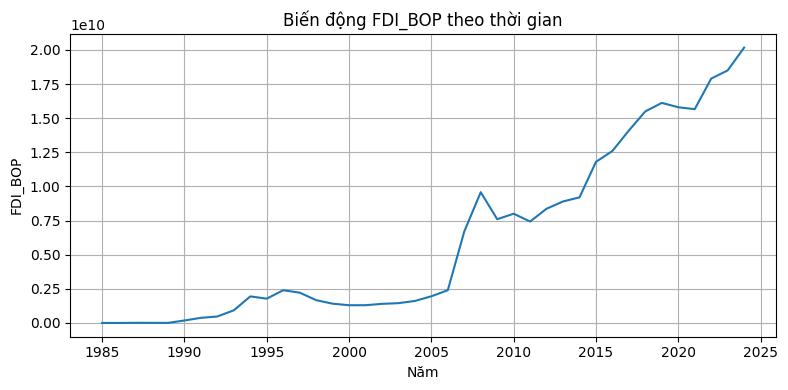

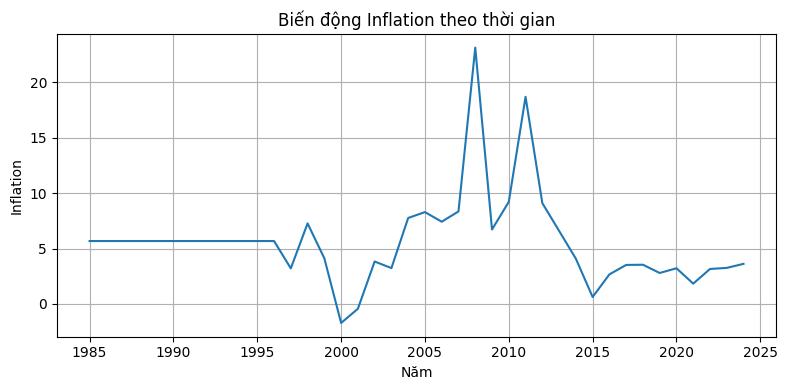

✅ Đã xuất file dữ liệu: macro_vietnam_processed.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ĐỔI ".." → NaN (CHUẨN HÓA GIÁ TRỊ THIẾU)
df = df.replace("..", np.nan)

# 2. ĐỔI TÊN CỘT (CHUẨN HÓA TÊN)
rename_map = {
    "GDP (current US$) [NY.GDP.MKTP.CD]": "GDP",
    "GDP per capita (current US$) [NY.GDP.PCAP.CD]": "GDP_per_capita",
    "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]": "GDP_growth",
    "Population, total [SP.POP.TOTL]": "Population",
    "Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]": "FDI",
    "Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]": "FDI_BOP",
    "Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]": "Inflation",
    "Export": "Export",
    "Import": "Import",
    "TradeBalance": "TradeBalance"
}

df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# 3. ÉP KIỂU DỮ LIỆU SANG SỐ
candidate_vars = [
    "GDP",
    "GDP_per_capita",
    "GDP_growth",
    "Population",
    "Export",
    "Import",
    "TradeBalance",
    "FDI",
    "FDI_BOP",
    "Inflation"
]

for col in candidate_vars:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. HIỂN THỊ DỮ LIỆU TRƯỚC XỬ LÝ
print("===== DỮ LIỆU TRƯỚC TIỀN XỬ LÝ =====")
display(df.head())
print("\nGIÁ TRỊ THIẾU:")
display(df.isnull().sum())

# 5. XỬ LÝ GIÁ TRỊ THIẾU (BACKFILL)
df_ = df.sort_values("Year").reset_index(drop=True)
df_ = df_[df_["Year"] >= 1985].reset_index(drop=True)
df_processed = df_.bfill().ffill()

print("\n===== DỮ LIỆU SAU TIỀN XỬ LÝ (BACKFILL) =====")
display(df_processed.head())
print("\nGIÁ TRỊ THIẾU:")
display(df_processed.isnull().sum())

# 6. THỐNG KÊ MÔ TẢ
print("\n===== THỐNG KÊ MÔ TẢ =====")
display(df_processed.describe())

# 7. MA TRẬN TƯƠNG QUAN
corr_vars = [col for col in candidate_vars if col in df_processed.columns]

print("\nCÁC BIẾN DÙNG TRONG MA TRẬN TƯƠNG QUAN:")
print(corr_vars)

corr_matrix = df_processed[corr_vars].corr()
display(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các chỉ tiêu kinh tế vĩ mô")
plt.tight_layout()
plt.show()

# 8. VẼ BIẾN ĐỘNG THEO THỜI GIAN
for col in corr_vars:
    plt.figure(figsize=(8, 4))
    plt.plot(df_processed["Year"], df_processed[col])
    plt.xlabel("Năm")
    plt.ylabel(col)
    plt.title(f"Biến động {col} theo thời gian")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 9. XUẤT FILE CSV ĐÃ XỬ LÝ
output_file = "macro_vietnam_processed.csv"
df_processed.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"✅ Đã xuất file dữ liệu: {output_file}")

